In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\madas\Downloads\ethnic_diversity.xlsx")

In [3]:
df.head()

,Employee_Name,EmpID,Position,State,Zip,Gender,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450.0,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460.0,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,NaN
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703.0,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170.0,F,Married,US Citizen,Terminated for Cause,Admin Offices,NaN,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330.0,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


### Data cleaning

### Missing values

In [4]:
df.isna().sum()

Employee_Name        0
EmpID                0
Position             3
State                2
Zip                  2
Gender               7
MaritalDesc          9
CitizenDesc          3
EmploymentStatus     0
Department           5
Salaries            12
age                  0
Race                 9
dtype: int64

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df['Race'].fillna(method = 'ffill',inplace = True)

In [7]:
df['Salaries'].fillna(method = 'bfill',inplace = True)

In [8]:
df['Department'].fillna(method = 'ffill',inplace = True)

In [9]:
df['CitizenDesc'].fillna(method = 'bfill',inplace = True)

In [10]:
df['MaritalDesc'].fillna(method = 'ffill',inplace = True)

In [11]:
df['Gender'].fillna(method = 'bfill',inplace = True)

In [12]:
df['Zip'].fillna(method = 'ffill',inplace = True)

In [13]:
df['State'].fillna(method = 'bfill',inplace = True)

In [14]:
df['Position'].fillna(method = 'ffill',inplace = True)

In [15]:
df.isna().sum()

Employee_Name       0
EmpID               0
Position            0
State               0
Zip                 0
Gender              0
MaritalDesc         0
CitizenDesc         0
EmploymentStatus    0
Department          0
Salaries            0
age                 0
Race                0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df[(df['age']<0)|(df['age']>100)]

,Employee_Name,EmpID,Position,State,Zip,Gender,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race


### univariate_Analysis

In [18]:
df.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                 float64
Gender               object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

### Numerical
**Histogram**

<Axes: title={'center': 'Histogram of Salaries'}, xlabel='Salaries', ylabel='Frequency'>

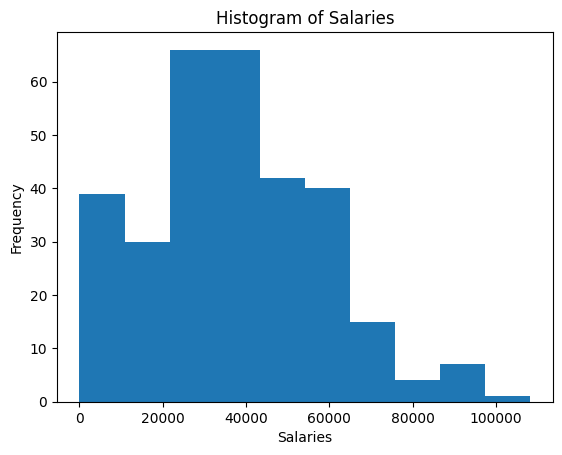

In [19]:
df['Salaries'].plot(kind = 'hist',title = 'Histogram of Salaries',xlabel = 'Salaries')

+ The histogram plot shows the distribution of salaries from the minimum to the maximum.
+ Most frequent salaries are between 38,000 to 42,000.
+ Least frequent salaries are above 98,000 to 100,000 and beyond.
+ The average salary of the employees is close to 37,000.
+ 2 employees received the highest package.
+ 42 employees received the lowest package.

### Density plot

<Axes: title={'center': 'density of Zip'}, ylabel='Density'>

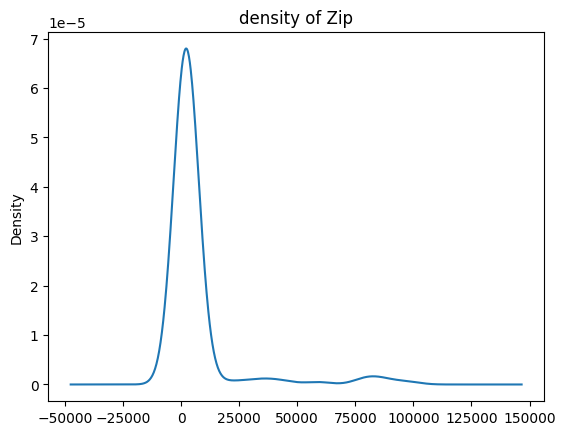

In [20]:
df['Zip'].plot(kind = 'density',title = 'density of Zip',xlabel = 'Zip')

+ The Density plot shows the distribution of zip from the minimum to the maximum.
+ As we can see, the curve is bell shaped curve so the data points are following the normal distribution.
+ The y-axis is labeled from 0 to 7, representing density values.
+ There are some points on the plot. These points could represent specific values or outliers in the data.

### Boxplot

<Axes: title={'center': 'Box of age'}, ylabel='age'>

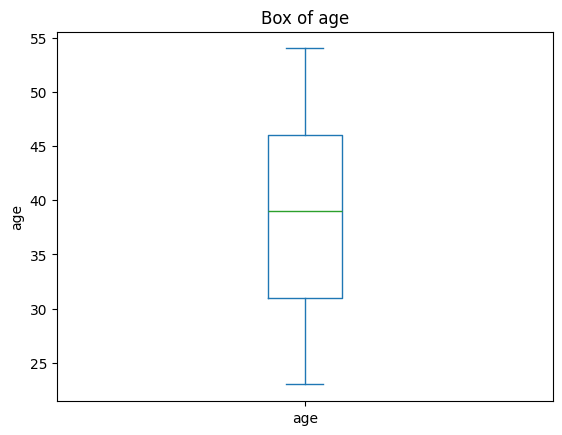

In [21]:
df['age'].plot(kind = 'box',title = 'Box of age',ylabel = 'age')

+ The boxplot shows the distribution of ages ranging from the 0 to 100.
+ From boxplot all the values are true values as per the dataset so the values can not be replaced or removed.
+ The observation states that there are no outliers in the age column. Outliers are data points that significantly differ from the rest of the dataset.

### cobination of density and histogram

<Axes: xlabel='age', ylabel='Density'>

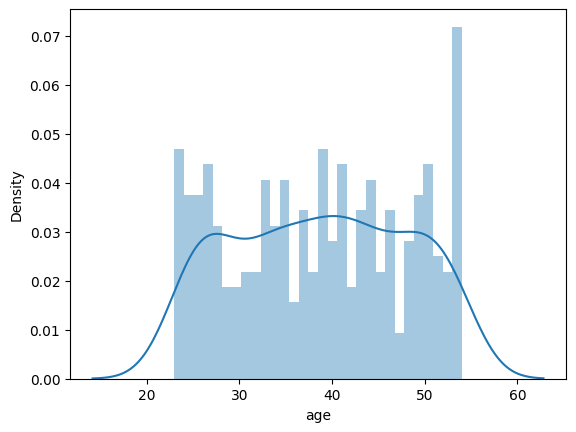

In [41]:
sns.distplot(df['age'],bins = 30)

+ It appears that two plots are combined in the distplot.
+ The Distplot shows the distribution of ages ranging from the 0 to 100.
+ As we can see, the curve is Not bell shaped curve so the data points are Not following the normal distribution.
+ The y-axis is labeled from 0.00 to 0.7, representing the distribution plot values.
+ The observation mentions that the age group around 55 has a higher frequency, indicating that more people fall into this age category.

<Axes: xlabel='Salaries'>

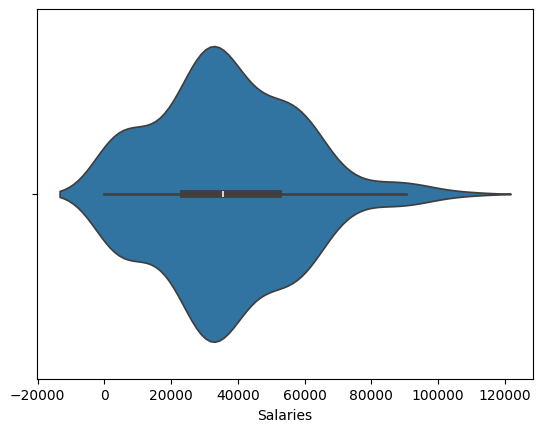

In [42]:
sns.violinplot(data =df,x = 'Salaries')

+ It appears that two plots are combined in the violinplot.
+ The violinplot shows the distribution of salaries from the minimum to the maximum.
+ The observation states that there are no outliers in the salaries column. Outliers are data points that significantly differ from the rest of the dataset.

### categorical
**bar plot**

<Axes: title={'center': 'bar plot of Gender'}, xlabel='Gender', ylabel='Gender'>

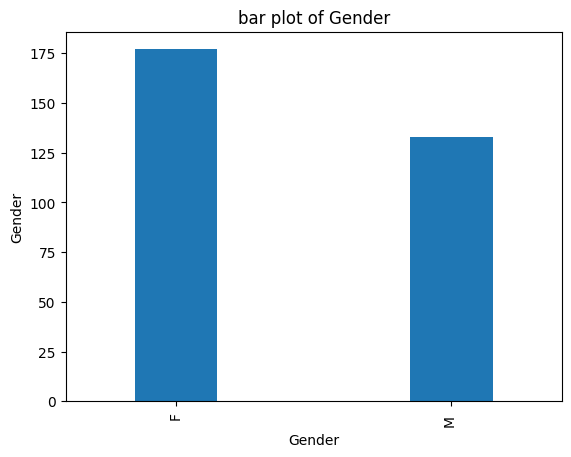

In [22]:
df['Gender'].value_counts().plot(kind = 'bar',title = 'bar plot of Gender',ylabel = 'Gender',width = 0.3)

+ The barplot illustrates the distribution of gender, specifically for males and females.
+ The observation mentions that females have a higher population compared to males. 
+ This implies that there are more female individuals represented in the dataset than male individuals.

### countplot

<Axes: xlabel='MaritalDesc', ylabel='count'>

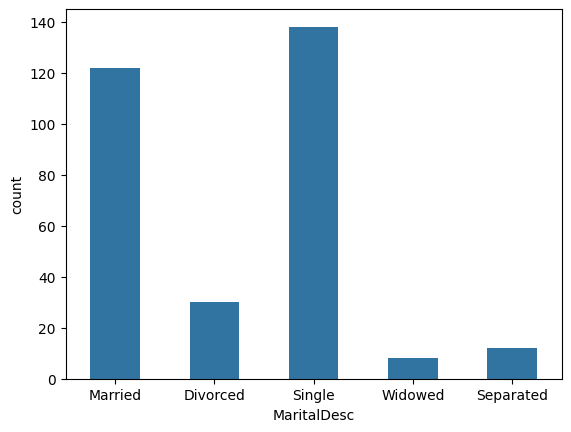

In [23]:
sns.countplot(data = df,x = 'MaritalDesc',width = 0.5)

+ The countplot visualizes the distribution of different marital statuses.
+ The observation notes that the "Single" category has a higher population compared to other categories. This suggests that there are more individuals with a marital status of "Single" in the dataset.
+ The observation also mentions that the "Widowed" category has a lower population compared to other categories, indicating fewer individuals with a marital status of "Widowed."
+ The countplot indicates that there are 120 individuals with a marital status of "Married."

### pie chat

<Axes: title={'center': 'pie chart of CitizenDesc'}, ylabel='count'>

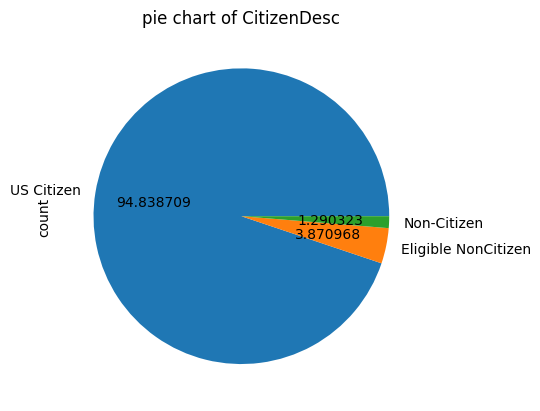

In [24]:
df['CitizenDesc'].value_counts().plot(kind = 'pie',title = 'pie chart of CitizenDesc',autopct = "%1f")

<Axes: title={'center': 'pie chart of Department'}, ylabel='count'>

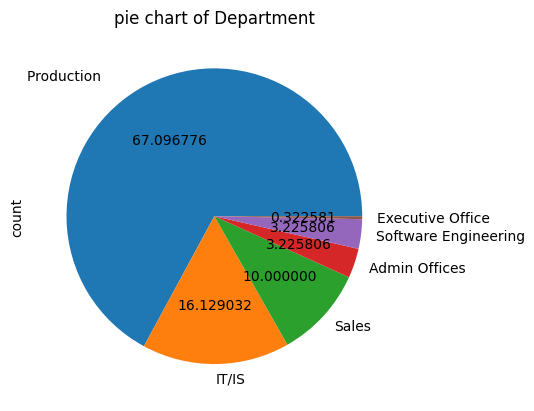

In [25]:
df['Department'].value_counts().plot(kind = 'pie',title = 'pie chart of Department',autopct = "%1f")

+ The piechart visualizes the distribution of various Departments.
+ The observation mentions that the "Production" department has a high percentage of the data, indicating a significant presence of this department in the dataset.
+ The observation also notes that the "Executive Office" department has a low percentage of the data, suggesting a smaller representation of this department.
+ Additionally, it's mentioned that the "IT Sector" has the second-highest percentage among the departments.

### Bivariate_Analysis

#### categorical & Numerical

### crosstab

In [26]:
pd.crosstab(index = df['Gender'],columns =df['MaritalDesc'])

MaritalDesc,Divorced,Married,Separated,Single,Widowed
Gender,,,,,
F,16,72,9,76,4
M,14,50,3,62,4


### countplot

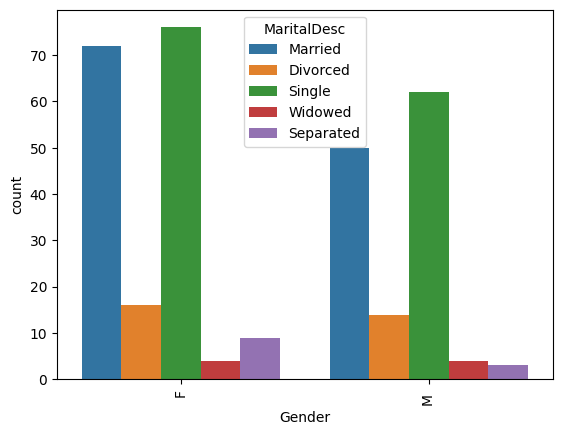

In [27]:
sns.countplot(data = df,x = 'Gender',hue = 'MaritalDesc')
plt.xticks(rotation = 90)
plt.show()

+ The countplot illustrates the distribution of individuals based on both gender and marital status.
+ Different colors are used to represent different marital statuses: blue for married, orange for divorced, green for single, brown for widowed, and purple for separated.
+ The observation mentions that females have a higher population compared to males.
+ This implies that there are more female individuals represented in the dataset than male individuals.

### categorical & Numerical

#### bar plot

In [28]:
df.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                 float64
Gender               object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

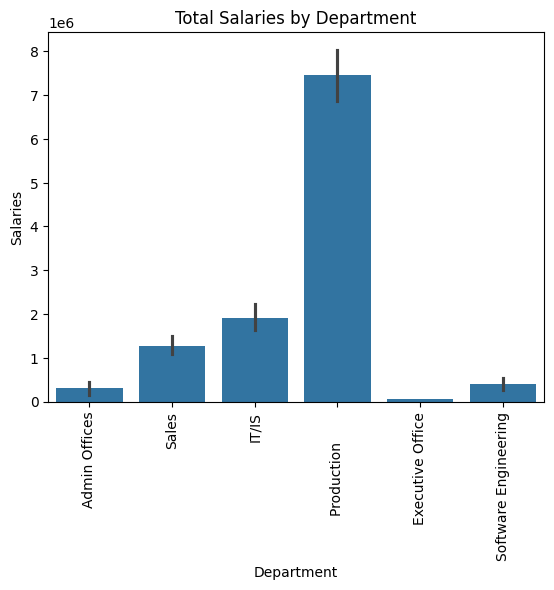

In [29]:
sns.barplot(data = df, x = 'Department',y = 'Salaries',estimator = 'sum')
plt.title('Total Salaries by Department')
plt.xticks(rotation = 90)
plt.show()

+ The bar plot illustrates the distribution of salaries across various departments.
+ The observation notes that individuals in production roles received a high package, indicating that this department has a higher average salary or includes individuals with higher salaries.
+ Conversely, the Executive Office is mentioned to have received a low package, suggesting a lower average salary or lower salaries for individuals in this department.


### groupby

In [30]:
df.groupby(by = df['Department'])['Salaries'].agg(np.sum)

Department
Admin Offices            301833.02
Executive Office          52633.50
IT/IS                   1919691.11
Production              7460897.84
Sales                   1279121.01
Software Engineering     399238.78
Name: Salaries, dtype: float64

### pivot table

In [31]:
df.pivot_table(values = 'Salaries',index = 'Gender',columns = 'MaritalDesc',margins = True)

MaritalDesc,Divorced,Married,Separated,Single,Widowed,All
Gender,,,,,,
F,27990.031875,37425.038333,28275.883333,39082.283421,31875.5550,36693.118531
M,40464.578571,33139.632600,54575.223333,38478.088387,36470.1000,36982.956992
All,33811.487000,35668.724508,34850.718333,38810.833478,34172.8275,36817.468581


### Line chart

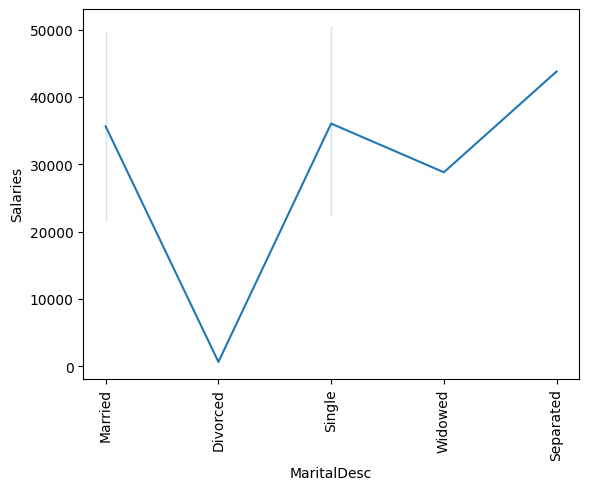

In [32]:
sns.lineplot(data = df.iloc[:20,:],x = 'MaritalDesc', y = 'Salaries')
plt.xticks(rotation = 90)
plt.show()

+ The line chart illustrates the salaries of individuals categorized by marital status.
+ The observation notes that singles have the highest salaries among the categories, indicating that, on average, individuals with a marital status of "Single" receive higher salaries.
+ Conversely, divorced individuals are mentioned to have lower salaries on average, suggesting a lower average salary for individuals with a marital status of "Divorced."

### Numerical & Numerical

In [33]:
df[['age','Salaries']].corr()

,age,Salaries
age,1.000000,0.004619
Salaries,0.004619,1.000000


### scatter plot

<Axes: xlabel='age', ylabel='Salaries'>

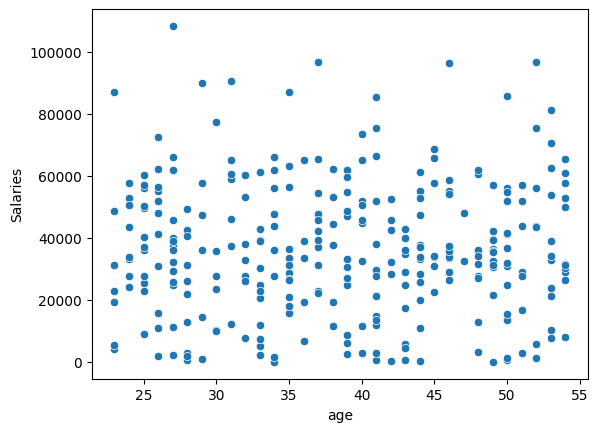

In [34]:
sns.scatterplot(data = df,x = 'age',y = 'Salaries')

<Axes: xlabel='Salaries', ylabel='Salaries'>

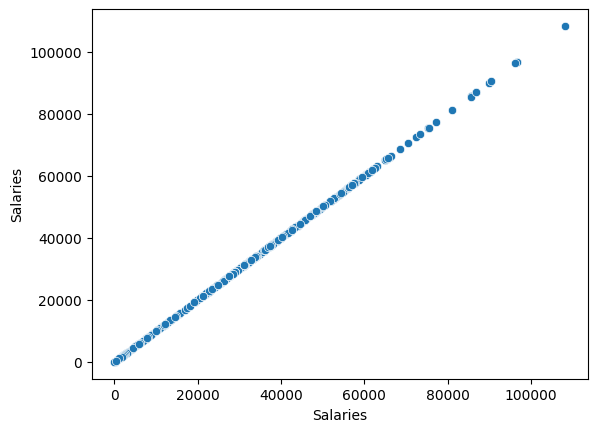

In [35]:
sns.scatterplot(data = df,x = 'Salaries',y = 'Salaries')

In [36]:
df.corr(numeric_only = True)

,EmpID,Zip,Salaries,age
EmpID,1.000000,0.130612,0.051514,-0.021266
Zip,0.130612,1.000000,0.042893,0.055144
Salaries,0.051514,0.042893,1.000000,0.004619
age,-0.021266,0.055144,0.004619,1.000000
